Primero Importamos las librerias necesarias para realizar la practica


In [1]:
### Utilizare las librerias de numpy para el tratamiento numérico y matplotlib para la graficacion

import numpy as np
import matplotlib.pyplot as plt

Ahora definiremos los parametros del transformador

In [2]:
S_base = 630e3  # Potencia nominal en VA
V_prim_nom = 20e3  # Tensión primaria nominal en V
V_sec_nom = 400  # Tensión secundaria nominal en V
Ecc = 4.5  # Tensión de cortocircuito en %
Pcu = 6500  # Pérdidas en el cobre en W


Tension aplicada en el primario (5% más)

In [3]:
V_prim_real = V_prim_nom * 1.05

Calculo de la impedancia de cortocircuito

In [5]:
Z_base = (V_prim_nom ** 2) / S_base
Z_cc = (Ecc / 100) * Z_base

Resistencia y reactancia

In [6]:
R_t = Pcu / S_base  
X_t = np.sqrt(Z_cc ** 2 - R_t ** 2)  

Definimos rango de carga

In [7]:
carga_pu = np.linspace(0, 1.5, 100)
fp_values = [0.6, 0.7, 0.8, 0.9, 1.0]  # Factores de potencia
colores = ['r', 'g', 'b', 'm', 'k']

Creacion de la grafica

Text(0.5, 1.0, 'Variación de la tensión en función de la carga')

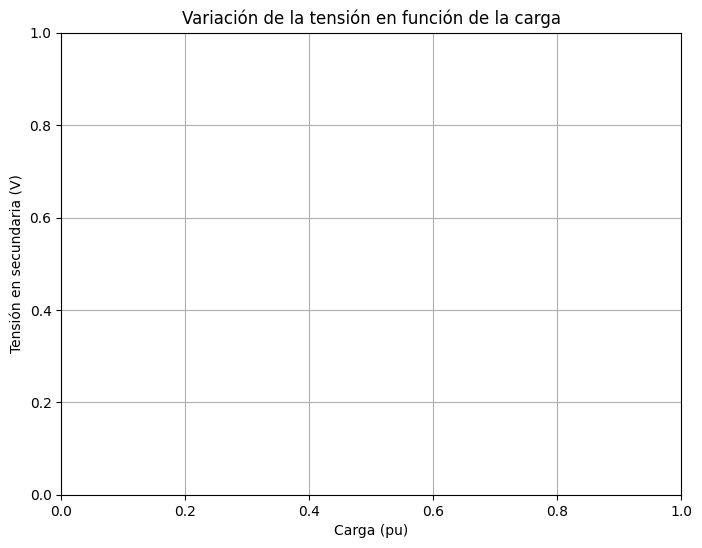

In [8]:
plt.figure(figsize=(8, 6))
plt.grid(True)
plt.xlabel('Carga (pu)')
plt.ylabel('Tensión en secundaria (V)')
plt.title('Variación de la tensión en función de la carga')

Ahora añadimos los datos a la grafica

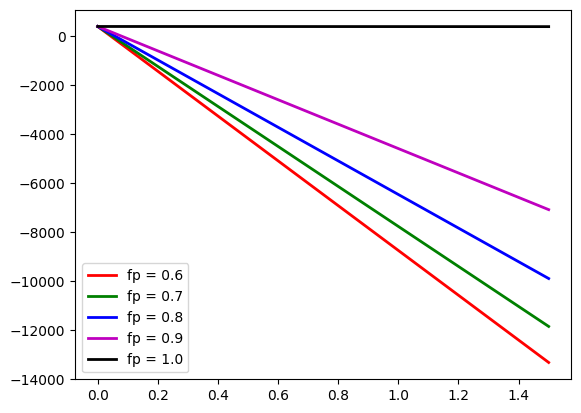

In [9]:
for i, fp in enumerate(fp_values):
    cos_theta = fp
    sin_theta = np.sqrt(1 - cos_theta ** 2)

    # Caída de tensión
    Delta_V = carga_pu * (R_t * cos_theta + X_t * sin_theta) * V_sec_nom

    # Tensión en secundaria
    V_sec = V_sec_nom - Delta_V

    plt.plot(carga_pu, V_sec, color=colores[i], linewidth=2, label=f'fp = {fp:.1f}')

# Mostrar leyenda
plt.legend()
plt.show()

Codigo de lo mismo pero en Matlab code

In [ ]:
% Parámetros del transformador
S_base = 630e3; % Potencia nominal en VA
V_prim_nom = 20e3; % Tensión primaria nominal en V
V_sec_nom = 400; % Tensión secundaria nominal en V
Ecc = 4.5; % Tensión de cortocircuito en %
Pcu = 6500; % Pérdidas en el cobre en W

% Tensión aplicada en el primario (5% más)
V_prim_real = V_prim_nom * 1.05;

% Cálculo de la impedancia de cortocircuito
Z_base = (V_prim_nom^2) / S_base;
Z_cc = (Ecc / 100) * Z_base;

% Resistencia y Reactancia
R_t = Pcu / S_base; % Resistencia en pu
X_t = sqrt(Z_cc^2 - R_t^2); % Reactancia en pu

% Rango de carga (0% a 150%)
carga_pu = linspace(0, 1.5, 100);
fp = [0.6, 0.7, 0.8, 0.9, 1.0]; % Factores de potencia
colores = ['r', 'g', 'b', 'm', 'k'];

figure;
hold on;
grid on;
xlabel('Carga (pu)');
ylabel('Tensión en secundaria (V)');
title('Variación de la tensión en función de la carga');

for i = 1:length(fp)
    cos_theta = fp(i);
    sin_theta = sqrt(1 - cos_theta^2);
    
    % Caída de tensión
    Delta_V = carga_pu .* (R_t * cos_theta + X_t * sin_theta) * V_sec_nom;
    
    % Tensión en secundaria
    V_sec = V_sec_nom - Delta_V;
    
    plot(carga_pu, V_sec, 'Color', colores(i), 'LineWidth', 2, 'DisplayName', sprintf('fp = %.1f', fp(i)));
end

legend show;
hold off;
